# Import Packages

In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2#OPENCV
import tensorflow as tf
from tqdm import tqdm

In [7]:
class_names = ['abnormal','normal']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

len(class_names)

2

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [8]:
def load_data():

    datasets = [r"C:\Users\LENOVO\OneDrive\Desktop\LUN-CANCER\train",
                r"C:\Users\LENOVO\OneDrive\Desktop\LUN-CANCER\test"]

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [9]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\LENOVO\OneDrive\Desktop\LUN-CANCER\train


100%|██████████| 148/148 [00:01<00:00, 87.73it/s]


Loading C:\Users\LENOVO\OneDrive\Desktop\LUN-CANCER\test


100%|██████████| 88/88 [00:00<00:00, 161.00it/s]


In [10]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [11]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("N oumber of training datasetf train: {}".format(n_train))
print ("Number of testing dataset of test: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

N oumber of training datasetf train: 303
Number of testing dataset of test: 165
Each image is of size: (150, 150)


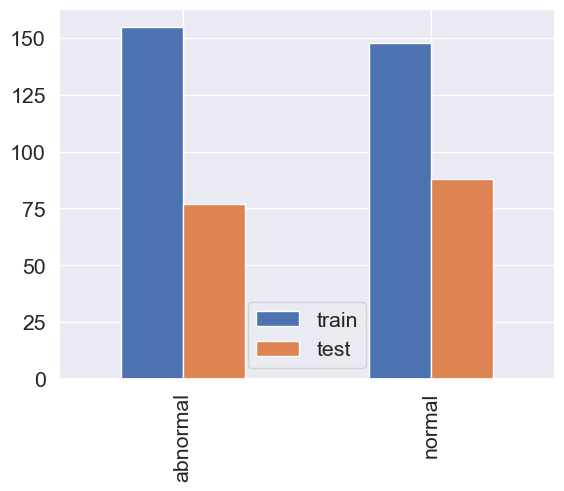

In [12]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

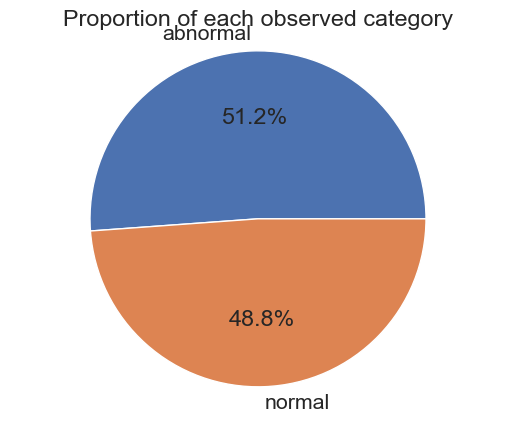

In [13]:
plt.pie(train_counts,
        explode=(0,0,) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [15]:
def display_random_image(class_names, images, labels):


    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

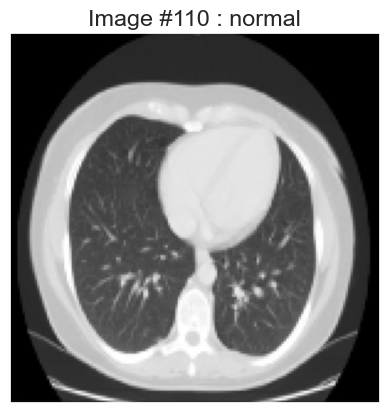

In [16]:
display_random_image(class_names, train_images, train_labels)

In [17]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

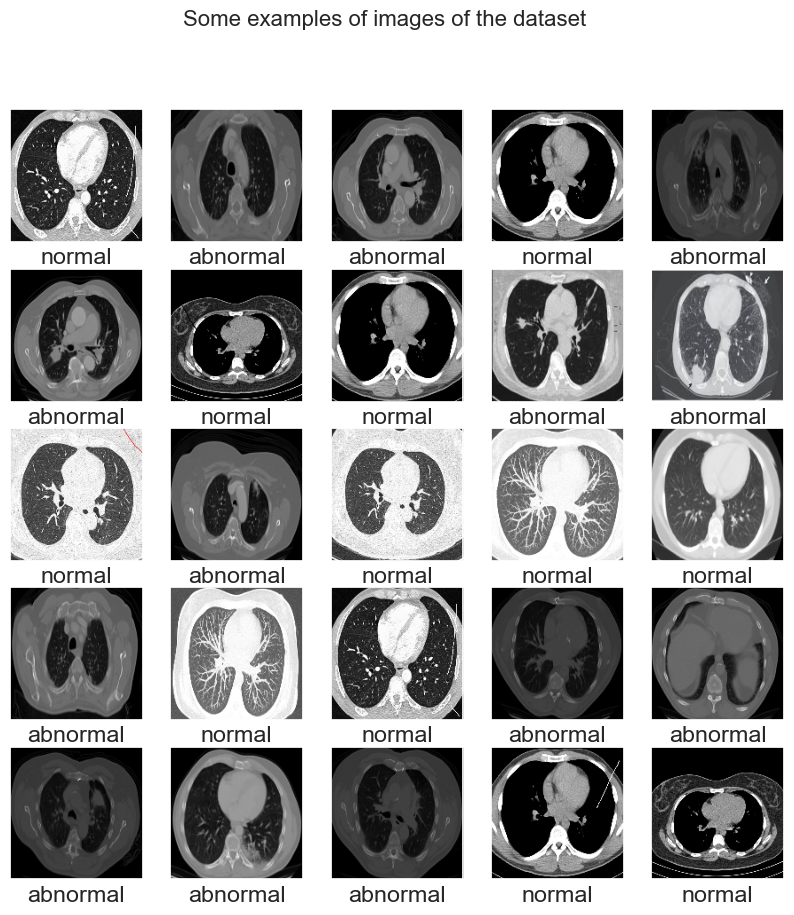

In [18]:
display_examples(class_names, train_images, train_labels)

In [19]:
#cnn-aLGORITHM
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 914ms/step - accuracy: 0.3678 - loss: 1.1130 - val_accuracy: 0.5410 - val_loss: 4.6766
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step - accuracy: 0.5537 - loss: 3.2208 - val_accuracy: 0.4590 - val_loss: 0.9128
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step - accuracy: 0.4959 - loss: 1.1275 - val_accuracy: 0.4590 - val_loss: 1.2191
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step - accuracy: 0.4959 - loss: 1.0298 - val_accuracy: 0.6066 - val_loss: 0.5581
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step - accuracy: 0.7562 - loss: 0.4838 - val_accuracy: 0.8361 - val_loss: 0.5073
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step - accuracy: 0.8719 - loss: 0.4478 - val_accuracy: 0.7705 - val_loss: 0.5374
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step - accuracy: 0.8099 - loss: 0.3995 - val_accuracy: 0.8033 - val_loss: 0.3631
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step - accuracy: 0.9132 - loss: 0.2236 - val_accuracy: 0.9344 - val_loss:

In [22]:
test_loss = model.evaluate(test_images, test_labels)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 8.8418e-04


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[1]


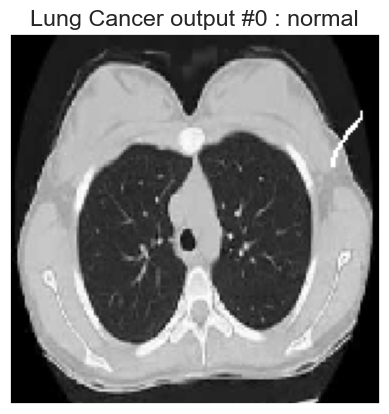

In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\LENOVO\OneDrive\Desktop\LUN-CANCER\test\normal\10 - Copy.png", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Lung Cancer output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

In [24]:
model.save_weights("model_vgg.weights.h5")
print("Saved model to disk")


Saved model to disk


In [25]:
model_json=model.to_json()
with open("model_vgg.json", "w") as json_file:
    json_file.write(model_json)

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_vgg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights(""model_vgg.weights.h5"")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ['abnormal','normal']
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [13/Feb/2026 11:01:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Feb/2026 11:01:03] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [13/Feb/2026 11:01:03] "GET /static/images/im.jpg HTTP/1.1" 304 -
127.0.0.1 - - [13/Feb/2026 11:01:03] "GET /static/images/img1.jpg HTTP/1.1" 304 -
127.0.0.1 - - [13/Feb/2026 11:01:03] "GET /favicon.ico HTTP/1.1" 404 -


uploads\000002 (6).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


127.0.0.1 - - [13/Feb/2026 11:01:21] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [13/Feb/2026 11:01:21] "GET /classify/000002%20(6).png HTTP/1.1" 200 -
127.0.0.1 - - [13/Feb/2026 11:01:21] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [13/Feb/2026 11:01:21] "GET /static/images/img1.jpg HTTP/1.1" 304 -


[9.9953985e-01 4.6012187e-04 2.4914037e-09 1.3730043e-10]


127.0.0.1 - - [13/Feb/2026 11:01:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Feb/2026 11:01:58] "GET /static/script.js HTTP/1.1" 304 -
127.0.0.1 - - [13/Feb/2026 11:01:58] "GET /static/images/im.jpg HTTP/1.1" 304 -
127.0.0.1 - - [13/Feb/2026 11:01:58] "GET /static/images/img1.jpg HTTP/1.1" 304 -
